In [2]:
import sys
sys.path.append("..")
import pickle

import pandas as pd
import numpy as np
from keras import backend as K
from keras.models import load_model

from cleaning import cleaning_functions
from analysis import analysis_functions

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
cleaning_meta_dict = pickle.load(open( "../cleaning/meta_dict.p", "rb" ))
analysis_meta_dict = pickle.load(open( "../analysis/meta_dict.p", "rb" ))
model = load_model("../analysis/model.hdf5")

In [5]:
import time, random
from gensim.models import word2vec
from sklearn.neighbors import KDTree

In [16]:
# analysis_meta_dict["embeddings"].init_sims(replace = True)

In [3]:
i = 0
for vocab in analysis_meta_dict["embeddings"].wv.vocab.items():
    word = vocab[0]
    count = vocab[1].count
    print(word, count)
    i += 1
    if i >= 10: break

NameError: name 'analysis_meta_dict' is not defined

In [7]:
def get_counts(word):
    return analysis_meta_dict["embeddings"].wv.vocab[word].count

In [100]:
num_counts = dict()
for i in range(101,1001):
    if str(i) in analysis_meta_dict["embeddings"].wv:
        num_counts[i] = get_counts(str(i))


In [76]:
from matplotlib import pyplot as plt

In [ ]:
plt.bar(list(num_counts.keys()), list(num_counts.values()))

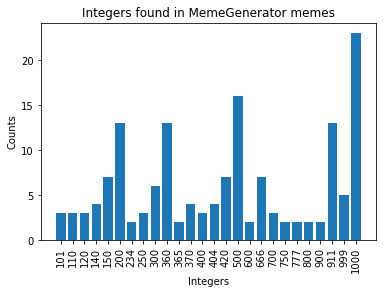

In [101]:
plt.bar(range(len(num_counts)), list(num_counts.values()), tick_label=list(num_counts.keys()))
plt.title("Integers found in MemeGenerator memes")
plt.xticks(rotation='vertical')
plt.xlabel("Integers")
plt.ylabel("Counts")
plt.show()

In [182]:
start = time.time()
for word in words:
    print(analysis_meta_dict["embeddings"].wv.similar_by_vector(analysis_meta_dict["embeddings"].wv[word], topn = 5))
    break
stop = time.time()
print("time/query by most_similar Search = %.2f ms" % (1000*float(stop-start)/len(words)))

[('breakup', 1.0), ('shock', 0.9409939646720886), ('cough', 0.9397492408752441), ('prove', 0.9367891550064087), ('backup', 0.9366786479949951)]
time/query by most_similar Search = 0.00 ms


In [337]:
sec_size = analysis_meta_dict["embeddings"].vector_size + len(analysis_meta_dict["pos"]) + len(analysis_meta_dict["sentiment"])
input_data = model.input

In [338]:
# build a loss function that maximizes the activation
loss = K.mean(model.output[:, output_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_data)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_data], [loss, grads])

In [360]:
# we start from a gray image with some noise
input_new_data = np.random.random((1, 50, sec_size))
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_new_data])
    input_new_data += grads_value * .05

In [345]:
for i in range(50):
    print(analysis_meta_dict["embeddings"].wv.similar_by_vector(input_new_data, topn = 5))
    break

50


In [366]:
sentence = list()
for word_vector in input_new_data[0]:
    sentence.append(analysis_meta_dict["embeddings"].wv.similar_by_vector(word_vector[0:50], topn = 5)[0][0])
print(' '.join(sentence))

olivia olivia *ddr3 staircase notion a+ a+ olivia 2-0 *ddr3 spank notion notion a+ olivia olivia 2-0 perfection *ddr3 olivia olivia napster olivia sank lot* *low notion olivia perfection sank perfection notion olivia 2-0 sank o'clock a+ perfection olivia 2-0 napster notion notion a+ perfection 2-0 notion sank tosh transit


In [543]:
def get_meme_of_type(meme_num):
    output_index = meme_num
    
    # build a loss function that maximizes the activation
    loss = K.mean(model.output[:, output_index])

    # compute the gradient of the input with this loss
    grads = K.gradients(loss, input_data)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # this function returns the loss and grads given the input
    iterate = K.function([input_data], [loss, grads])
    
    # we start from some noise
    input_new_data = (np.random.random((1, 50, sec_size)) - .5)*2
    # run gradient ascent for 20 steps
    for i in range(200):
        loss_value, grads_value = iterate([input_new_data])
        input_new_data += grads_value * .05

    return input_new_data

In [544]:
new_meme = get_meme_of_type(np.argmax(analysis_meta_dict["memes"]["Captain Picard"]))

class_scores = model.predict(new_meme)[0]
best_class = np.argmax(class_scores)

print("predicted class: " + str(best_class) + ", at " + str(class_scores[np.argmax(class_scores)]))

sentence = list()
for word_vector in new_meme[0]:
    potential_words = analysis_meta_dict["embeddings"].wv.similar_by_vector(word_vector[0:50], topn = 50)
    if(len(sentence)%2 ==  0): sentence.append(potential_words[0][0])
    else: 
        pos_next = analysis_meta_dict["embeddings"].predict_output_word(sentence[-1:])
        sentence.append(pos_next[0][0])
print(' '.join(sentence))

predicted class: 3, at 0.97342074


"stingray y washroom on a+ bat waite can rant vote 3am '' forgive their staircase up bologna is moi y perfection gon ocarina does claiming na slenderman does up vote and people configure to 's there memo did singing u fisherman 're psycho gon 'how your improvement bat rubar be"

In [472]:
analysis_meta_dict["meme_names"]

array(['Awkward Situation Seal', 'Bad Luck Brian', 'Batman Slap Robin',
       'Captain Picard', 'Chemistry Cat', 'Condescending Wonka',
       'Confession Bear', 'Conspiracy Keanu', 'Correction Guy',
       'Disaster Girl', 'Doge', 'Dr Evil Meme', 'Drunk Baby',
       'First World Problems', 'Forever Alone', 'Futurama Fry',
       'Good Guy Greg', 'Grumpy Cat', 'Insanity Wolf', 'Joker Mind Loss',
       'Joseph Ducreux', 'Kermit Drinking Tea', 'Most Interesting Man',
       'Mr Bean', 'One Does Not Simply', 'Philosoraptor', 'Scumbag Steve',
       'Skeptical 3rd World Kid', 'Slowpoke', 'Southpark Bad Time',
       'Spongebob Imagination', 'Stoner Stanley', 'Success Kid',
       'Sudden Realization Ralph', 'That Would Be Great', 'Trollface',
       'Unpopular Opinion Puffin', 'What If I Told You', 'Y U No',
       'Yo Dawg'], dtype=object)

In [540]:
sentence = list()
for word_vector in new_meme[0]:
    potential_words = analysis_meta_dict["embeddings"].wv.similar_by_vector(word_vector[0:50], topn = 50)
    if(len(sentence)%2 ==  0): sentence.append(potential_words[0][0])
    else: 
        pos_next = analysis_meta_dict["embeddings"].predict_output_word(sentence[-1:])
        sentence.append(pos_next[0][0])
' '.join(sentence)

In [542]:
' '.join(sentence)

"improvement bat logan year flicker if islander his darn ! raped n't norway u anorexic be casket `` applies n't qatar na b*tech i revolution a in walk out of unsuccessful bat 11-5 turn aspergers about cowbell year dorm gon is there waltz if brainwash gon hamilton guy pet\\ ``"